In [433]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [434]:
#import semua library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.callbacks import EarlyStopping
from livelossplot import PlotLossesKeras

In [435]:
#membaca data 
data = pd.read_csv('data_arrhythmia.csv', sep =";")


In [436]:
#Menampilkan 5 data teratas
data.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


In [437]:
#Menampilkan 5 data terbawah
data.tail()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0,0.5,2.4,25.0,46.6,1
451,78,1,160,70,79,127,364,138,78,28,...,0.0,10.4,-1.8,0.0,0,0.5,1.6,21.3,32.8,1


In [438]:
#menampilkan jumlah baris dan kolom dalam bentuk dua dimensi
data.shape

(452, 280)

In [439]:
#statistika data
data.describe()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


In [440]:
#menghitung jumlah data yang null
pd.isnull(data).sum().sum()

0

In [441]:
#mengganti data null dengan lambang "?" menjadi NaN
data = data.replace('?', np.NaN)

In [442]:
#Menampilkan jumlah data null  setelah proses replace
nu=pd.isnull(data).sum().sum()
nu

408

Text(0, 0.5, 'Total number of null value in each column')

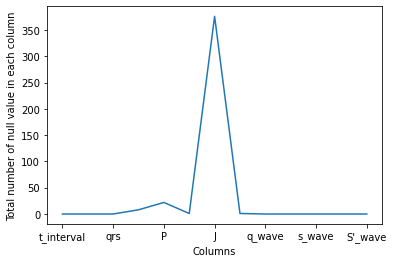

In [443]:
#menampilkan statistik data yang memiliki nilai null
pd.isnull(data).sum()[7:20].plot()
plt.xlabel('Columns')
plt.ylabel('Total number of null value in each column')

Text(0, 0.5, 'Total number of null value in each column')

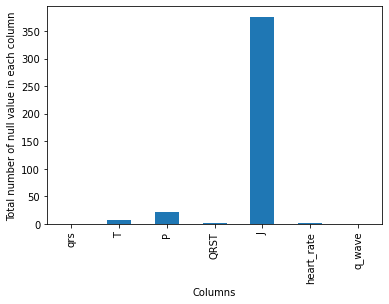

In [444]:
#menampilkan jumlah data null per attribut
pd.isnull(data).sum()[9:16].plot(kind="bar")
plt.xlabel('Columns')
plt.ylabel('Total number of null value in each column')

In [445]:
#menghapus attribut j dan p karena memiliki nilai null paling banyaj
data.drop(['J'], inplace=True, axis=1)
data.drop(['P'], inplace=True, axis=1)

In [446]:
#menghitung jumlah null yang terbaru
pd.isnull(data).sum().sum()

10

In [447]:
#mengecek jumlah atribut setelah proses penghapusan
data.shape

(452, 278)

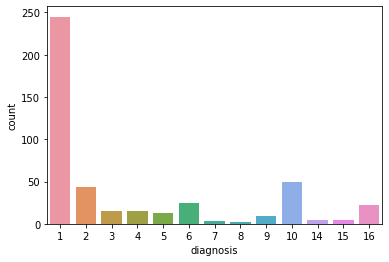

In [448]:
#menghitung jumlah orang per diagnosis level
sns.countplot(x ='diagnosis',data = data) 
plt.show()

In [449]:
#membuat copyan data
new_data = data.copy()

In [450]:
#mengganti nilai data NaN menjadi 0
new_data =new_data.replace(to_replace = np.nan, value = 0)


In [451]:
#menampilkan 5 data teratas
new_data.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


In [452]:
#menghitung data null setelah replace
pd.isnull(new_data).sum().sum()

0

In [453]:
#melakukan pengelompokan data untuk proses split
target=new_data["diagnosis"]
final_data = new_data.drop(columns ="diagnosis")

In [454]:
#pengecekan jumlah baris dan kolom
new_data.shape

(452, 278)

In [455]:
#menampilkan keselurahan isi new_data
new_data

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0,0.5,2.4,25.0,46.6,1


In [456]:
#melihat korelasi final_data dan diagnosis
target=new_data["diagnosis"]
pearsoncorr = final_data.corrwith(other = target,method='pearson')
pearsoncorr.values

array([-9.23812218e-02, -1.78080037e-01,  6.64802711e-03, -9.01507390e-02,
        3.23878728e-01, -9.99540161e-02,  2.83049762e-02,  9.76253981e-02,
       -1.22002504e-01,  1.95854526e-02,  3.96491896e-03,  4.26738126e-02,
        1.95198200e-01,  6.39992472e-02,             nan,  4.27635327e-02,
       -2.01150248e-02,  7.67517615e-03, -3.55694451e-02,  3.20969797e-02,
        3.20969797e-02,  8.30559434e-02, -3.61168680e-03,  4.83674292e-02,
        1.83082712e-01, -1.05049431e-02,  6.65428889e-02,  6.77662940e-02,
        4.17574601e-02,  7.98435069e-02, -2.01150248e-02,  1.69531020e-02,
       -3.60504699e-02, -6.66334979e-04, -2.36687153e-02,  1.16515578e-01,
        8.16735582e-02,  1.44307782e-02, -3.20137575e-02,  8.34076694e-02,
       -3.08114850e-02,  5.14341059e-02, -3.08114850e-02, -8.40208668e-02,
       -1.15446555e-02, -5.76271452e-03,  2.10381327e-02,  1.73243101e-01,
        2.54790200e-03,  1.09423863e-01, -3.08114850e-02,  1.41103081e-01,
       -6.43991926e-02,  

In [457]:
target.replace(to_replace = 2, value = 0,inplace = True)
target.replace(to_replace = 3, value = 0,inplace = True)
target.replace(to_replace = 4, value = 0,inplace = True)
target.replace(to_replace = 5, value = 0,inplace = True)
target.replace(to_replace = 6, value = 0,inplace = True)
target.replace(to_replace = 7, value = 0,inplace = True)
target.replace(to_replace = 8, value = 0,inplace = True)
target.replace(to_replace = 9, value = 0,inplace = True)
target.replace(to_replace = 10, value = 0,inplace = True)
target.replace(to_replace = 11, value = 0,inplace = True)
target.replace(to_replace = 12, value = 0,inplace = True)
target.replace(to_replace = 13, value = 0,inplace = True)
target.replace(to_replace = 14, value = 0,inplace = True)
target.replace(to_replace = 15, value = 0,inplace = True)
target.replace(to_replace = 16, value = 0,inplace = True)

In [458]:
#proses split data train dan testing
X_train,X_test,Y_train,Y_test = train_test_split( final_data, target, test_size=0.2,  random_state = 1)
Y_train


272    0
101    1
379    0
448    0
230    1
      ..
255    1
72     1
396    1
235    0
37     0
Name: diagnosis, Length: 361, dtype: int64

In [459]:
#melihat jumlah kolom dan baris setelah proses split
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(361, 277) (361,) (91, 277) (91,)


In [460]:
#normalisasi data
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)

[[ 0.86939799 -1.08383523  0.09349118 ...  0.75301883 -0.6470943
   0.02216099]
 [-0.47971472  0.92264947 -0.29612285 ... -0.22106798  2.05848523
   1.32552033]
 [-2.38073718 -1.08383523 -1.14840355 ...  0.75301883 -0.71237638
   0.17485581]
 ...
 [-0.11177489  0.92264947 -0.22307022 ...  0.89217409 -0.10307697
   0.63294026]
 [-0.11177489 -1.08383523  0.14219293 ... -1.82135345  0.51347601
  -1.11759676]
 [-0.72500794  0.92264947 -0.07696496 ...  2.14457141  0.54249027
   2.11080797]]


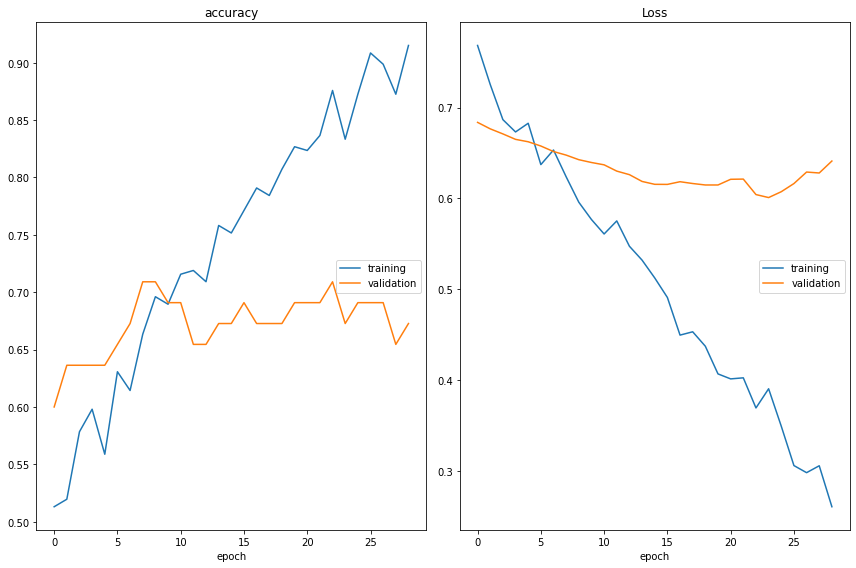

accuracy
	training         	 (min:    0.513, max:    0.915, cur:    0.915)
	validation       	 (min:    0.600, max:    0.709, cur:    0.673)
Loss
	training         	 (min:    0.261, max:    0.768, cur:    0.261)
	validation       	 (min:    0.601, max:    0.684, cur:    0.641)


In [461]:
#proses intialisasi data

model = tf.keras.models.Sequential()

#add a input layer
model.add(keras.layers.Dense(units=15, activation='relu', input_shape=X_train[0].shape))

#Add a hidden layer
model.add(keras.layers.Dense(units = 12,kernel_initializer ='glorot_uniform',name='Hidden-Layer-1',activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(units = 9,kernel_initializer ='glorot_uniform',name='Hidden-Layer-2',activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
#Add a output layer
model.add(keras.layers.Dense(units = 1,kernel_initializer ='glorot_uniform',activation='sigmoid'))

# compile the keras model/hyperparameter
model.compile(optimizer=tf.keras.optimizers.Adamax(0.001), loss='binary_crossentropy',metrics=['accuracy'])

monitor_val_acc = EarlyStopping(monitor = 'val_loss', patience = 5)
callbacks=[PlotLossesKeras()] 



#train data/ proses validasi
model.fit(X_train,Y_train, validation_split= 0.15, epochs=200, shuffle=True, batch_size = 32, callbacks=[PlotLossesKeras(), monitor_val_acc], verbose=0)

In [462]:
#evaluasi  train keras model
_, accuracy = model.evaluate(X_train, Y_train)
print('Accuracy: %.2f' % (accuracy*100))

12/12 [==============================] - 0s 2ms/step - loss: 0.2657 - accuracy: 0.9003
Accuracy: 90.03


In [464]:
#melakukan prediksi berdasarkan data test
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

pd.DataFrame(list(zip(Y_test,y_pred)), columns=['Actual', 'Predicted'])

3/3 [==============================] - 0s 5ms/step


,Actual,Predicted
0,0,[False]
1,1,[True]
2,1,[True]
3,0,[True]
4,1,[True]
...,...,...
86,1,[True]
87,1,[False]
88,1,[True]
89,1,[True]


In [465]:
#menampilkan matriks akurasi data testing
print(confusion_matrix(Y_test, y_pred))
print("akurasi : ",accuracy_score(Y_test, y_pred)*100,'%')

[[23 16]
 [ 8 44]]
akurasi :  73.62637362637363 %
